In [3]:
from dotenv import load_dotenv
load_dotenv()

In [18]:
from IPython.display import Image

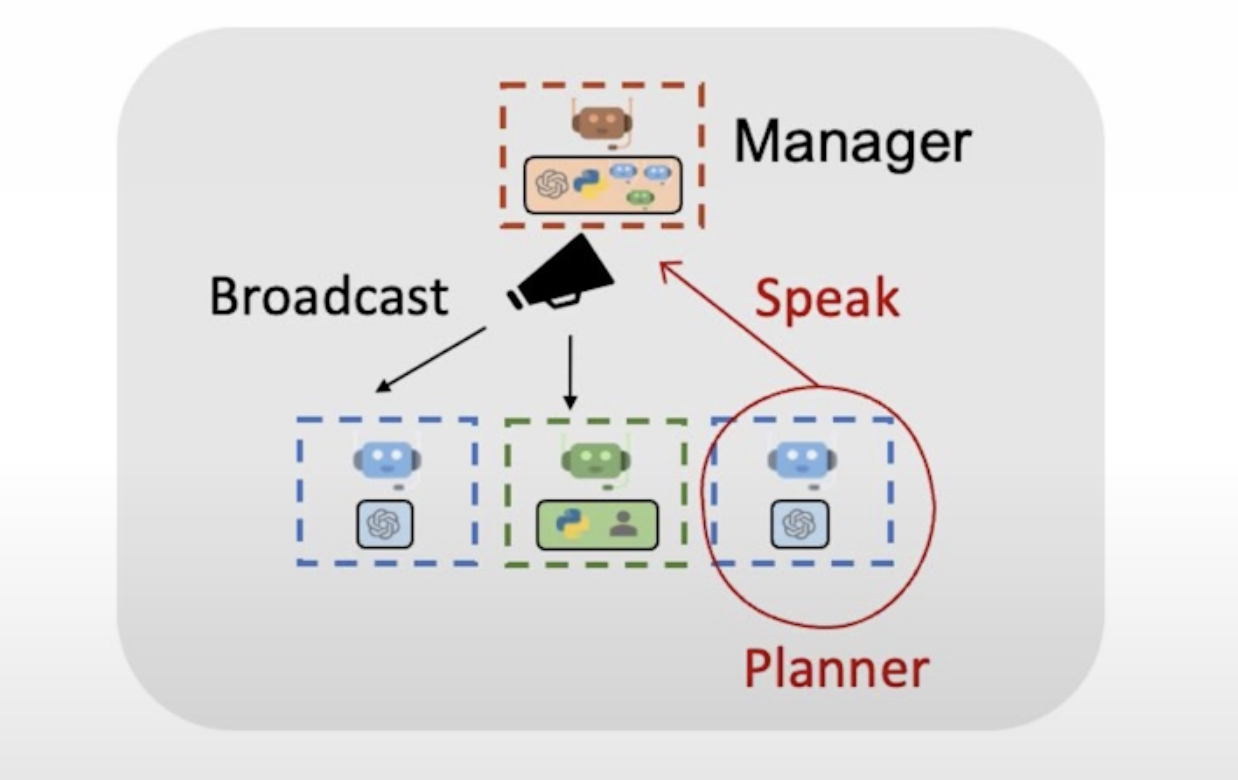

In [19]:
Image("img/006.broadcast.png")

In [4]:
llm_config = {"model": "gpt-4-turbo"}

In [5]:
task = "Write a blogpost about the stock price performance of "\
"Microsoft in the past year. Today's date is 2024-04-23."

In [6]:
import autogen

In [7]:
user_proxy = autogen.ConversableAgent(
    name="Admin",
    system_message="Give the task, and send "
    "instructions to writer to refine the blog post.",
    code_execution_config=False,
    llm_config=llm_config,
    human_input_mode="ALWAYS",
)

In [8]:
planner = autogen.ConversableAgent(
    name="Planner",
    system_message="Given a task, please determine "
    "what information is needed to complete the task. "
    "Please note that the information will all be retrieved using"
    " Python code. Please only suggest information that can be "
    "retrieved using Python code. "
    "After each step is done by others, check the progress and "
    "instruct the remaining steps. If a step fails, try to "
    "workaround",
    description="Planner. Given a task, determine what "
    "information is needed to complete the task. "
    "After each step is done by others, check the progress and "
    "instruct the remaining steps",
    llm_config=llm_config,
)

In [9]:
engineer = autogen.AssistantAgent(
    name="Engineer",
    llm_config=llm_config,
    description="An engineer that writes code based on the plan "
    "provided by the planner.",
)

In [10]:
executor = autogen.ConversableAgent(
    name="Executor",
    system_message="Execute the code written by the "
    "engineer and report the result.",
    human_input_mode="NEVER",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "coding",
        "use_docker": False,
    },
)

In [11]:
writer = autogen.ConversableAgent(
    name="Writer",
    llm_config=llm_config,
    system_message="Writer."
    "Please write blogs in markdown format (with relevant titles)"
    " and put the content in pseudo ```md``` code block. "
    "You take feedback from the admin and refine your blog.",
    description="Writer."
    "Write blogs based on the code execution results and take "
    "feedback from the admin to refine the blog."
)

#### Group chat

In [12]:
groupchat = autogen.GroupChat(
    agents=[user_proxy, engineer, writer, executor, planner],
    messages=[],
    max_round=10,
)

In [13]:
manager = autogen.GroupChatManager(
    groupchat=groupchat, llm_config=llm_config
)


In [14]:
groupchat_result = user_proxy.initiate_chat(
    manager,
    message=task,
)

Admin (to chat_manager):

Write a blogpost about the stock price performance of Microsoft in the past year. Today's date is 2024-04-23.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Planner (to chat_manager):

To write a blog post about the stock price performance of Microsoft in the past year, the following steps and information are essential:

1. **Stock Price Data for Microsoft**: Retrieve historical stock prices for Microsoft (MSFT) from 2023-04-23 to 2024-04-23. This includes daily open, high, low, close prices, and volume. Additionally, considering any stock splits or significant dividends would be essential to adjust historical data.

2. **Key Financial Events**: Identify any significant financial events during this period that could have impacted the stock price. This includes earnings announcements, product launches, or major business deals.

3. **Market Context**: Obtain general market indicators such as the S&

#### Speaker selection policy

In [15]:
user_proxy = autogen.ConversableAgent(
    name="Admin",
    system_message="Give the task, and send "
    "instructions to writer to refine the blog post.",
    code_execution_config=False,
    llm_config=llm_config,
    human_input_mode="ALWAYS",
)

planner = autogen.ConversableAgent(
    name="Planner",
    system_message="Given a task, please determine "
    "what information is needed to complete the task. "
    "Please note that the information will all be retrieved using"
    " Python code. Please only suggest information that can be "
    "retrieved using Python code. "
    "After each step is done by others, check the progress and "
    "instruct the remaining steps. If a step fails, try to "
    "workaround",
    description="Given a task, determine what "
    "information is needed to complete the task. "
    "After each step is done by others, check the progress and "
    "instruct the remaining steps",
    llm_config=llm_config,
)

engineer = autogen.AssistantAgent(
    name="Engineer",
    llm_config=llm_config,
    description="Write code based on the plan "
    "provided by the planner.",
)

writer = autogen.ConversableAgent(
    name="Writer",
    llm_config=llm_config,
    system_message="Writer. "
    "Please write blogs in markdown format (with relevant titles)"
    " and put the content in pseudo ```md``` code block. "
    "You take feedback from the admin and refine your blog.",
    description="After all the info is available, "
    "write blogs based on the code execution results and take "
    "feedback from the admin to refine the blog. ",
)

executor = autogen.ConversableAgent(
    name="Executor",
    description="Execute the code written by the "
    "engineer and report the result.",
    human_input_mode="NEVER",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "coding",
        "use_docker": False,
    },
)

In [16]:
groupchat = autogen.GroupChat(
    agents=[user_proxy, engineer, writer, executor, planner],
    messages=[],
    max_round=10,
    allowed_or_disallowed_speaker_transitions={
        user_proxy: [engineer, writer, executor, planner],
        engineer: [user_proxy, executor],
        writer: [user_proxy, planner],
        executor: [user_proxy, engineer, planner],
        planner: [user_proxy, engineer, writer],
    },
    speaker_transitions_type="allowed",
)

In [17]:
manager = autogen.GroupChatManager(
    groupchat=groupchat, llm_config=llm_config
)

groupchat_result = user_proxy.initiate_chat(
    manager,
    message=task,
)

Admin (to chat_manager):

Write a blogpost about the stock price performance of Microsoft in the past year. Today's date is 2024-04-23.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Planner (to chat_manager):

To write a blog post about the stock price performance of Microsoft in the past year, the following steps and information are essential:

1. **Stock Price Data for Microsoft**: Retrieve historical stock prices for Microsoft (MSFT) from 2023-04-23 to 2024-04-23. This includes daily open, high, low, close prices, and volume. Additionally, considering any stock splits or significant dividends would be essential to adjust historical data.

2. **Key Financial Events**: Identify any significant financial events during this period that could have impacted the stock price. This includes earnings announcements, product launches, or major business deals.

3. **Market Context**: Obtain general market indicators such as the S&